<a href="https://colab.research.google.com/github/varshithavijayakrishna/gui_parkinson_model/blob/main/recent_best_xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/parkinsons_disease_data_march11.csv')


In [ ]:
df.isnull().sum()


,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL']] = scaler.fit_transform(df[['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL']])


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = [rf_model, lr_model, xgb_model, svm_model]
model_names = ['Random Forest', 'Logistic Regression', 'XGBoost', 'SVM']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")



Random Forest Evaluation:
Accuracy: 0.8979
Precision: 0.9385
Recall: 0.9004
F1-Score: 0.9190
Confusion Matrix:
[[134  16]
 [ 27 244]]

Logistic Regression Evaluation:
Accuracy: 0.7910
Precision: 0.8188
Recall: 0.8672
F1-Score: 0.8423
Confusion Matrix:
[[ 98  52]
 [ 36 235]]

XGBoost Evaluation:
Accuracy: 0.9335
Precision: 0.9655
Recall: 0.9299
F1-Score: 0.9474
Confusion Matrix:
[[141   9]
 [ 19 252]]

SVM Evaluation:
Accuracy: 0.7862
Precision: 0.8047
Recall: 0.8819
F1-Score: 0.8415
Confusion Matrix:
[[ 92  58]
 [ 32 239]]


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_


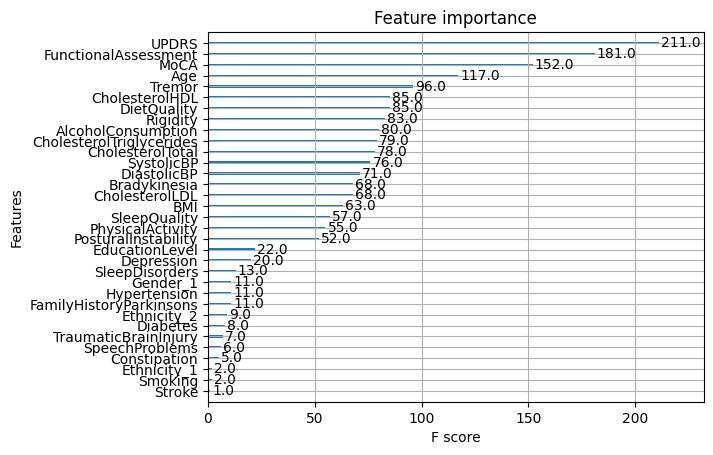

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


In [ ]:
import joblib
joblib.dump(xgb_model, 'best_xgb_model.pkl')


['best_xgb_model.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],           # Depth of trees
    'learning_rate': [0.01, 0.1, 0.2], # Step size in boosting
    'subsample': [0.8, 1],            # Sample ratio per tree
    'colsample_bytree': [0.8, 1]      # Features per tree
}

# Initialize model
xgb_model = xgb.XGBClassifier(random_state=42)

# Run GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_xgb_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
best_xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_tuned = best_xgb_model.predict(X_test)

print("Fine-Tuned XGBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")


Fine-Tuned XGBoost Evaluation:
Accuracy: 0.9335
Precision: 0.9620
Recall: 0.9336
F1-Score: 0.9476


In [ ]:
import joblib
joblib.dump(best_xgb_model, 'best_xgb_model_ft.pkl')


['best_xgb_model_ft.pkl']

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving best_xgb_model_ft.pkl to best_xgb_model_ft (1).pkl


In [ ]:
import joblib

# Load the trained XGBoost model
model = joblib.load("best_xgb_model.pkl")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
import numpy as np

# Example input data (Modify this based on your feature order)
sample_input = np.array([65, 25.4, 0, 2, 5, 3, 1, 0, 0, 1, 1, 1, 1, 1]).reshape(1, -1)

# Make prediction
prediction = model.predict(sample_input)[0]

# Output result
if prediction == 1:
    print("🔴 Parkinson’s detected")
else:
    print("🟢 No Parkinson’s detected")


ValueError: Feature shape mismatch, expected: 34, got 14

In [ ]:
model.get_booster().feature_names


['Age',
 'EducationLevel',
 'BMI',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'FamilyHistoryParkinsons',
 'TraumaticBrainInjury',
 'Hypertension',
 'Diabetes',
 'Depression',
 'Stroke',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'UPDRS',
 'MoCA',
 'FunctionalAssessment',
 'Tremor',
 'Rigidity',
 'Bradykinesia',
 'PosturalInstability',
 'SpeechProblems',
 'SleepDisorders',
 'Constipation',
 'Gender_1',
 'Ethnicity_1',
 'Ethnicity_2',
 'Ethnicity_3']

In [ ]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load("best_xgb_model_ft.pkl")

# Ensure the input matches the 34 features used during training
sample_input = np.array([
    65,  # Age
    3,   # EducationLevel
    25.4, # BMI
    0,   # Smoking
    2,   # AlcoholConsumption
    5,   # PhysicalActivity
    3,   # DietQuality
    4,   # SleepQuality
    1,   # FamilyHistoryParkinsons
    0,   # TraumaticBrainInjury
    0,   # Hypertension
    1,   # Diabetes
    0,   # Depression
    0,   # Stroke
    120, # SystolicBP
    80,  # DiastolicBP
    180, # CholesterolTotal
    100, # CholesterolLDL
    50,  # CholesterolHDL
    120, # CholesterolTriglycerides
    25,  # UPDRS
    26,  # MoCA
    85,  # FunctionalAssessment
    1,   # Tremor
    1,   # Rigidity
    1,   # Bradykinesia
    0,   # PosturalInstability
    1,   # SpeechProblems
    1,   # SleepDisorders
    0,   # Constipation
    1,   # Gender_1
    0,   # Ethnicity_1
    1,   # Ethnicity_2
    0    # Ethnicity_3
]).reshape(1, -1)

# Check feature count before prediction
expected_features = model.get_booster().num_features()
actual_features = sample_input.shape[1]

if actual_features != expected_features:
    print(f"❌ Feature count mismatch! Expected {expected_features}, but got {actual_features}.")
else:
    # Make prediction
    prediction = model.predict(sample_input)[0]

    # Output result
    if prediction == 1:
        print("🔴 Parkinson’s detected")
    else:
        print("🟢 No Parkinson’s detected")


🟢 No Parkinson’s detected


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the full test set
y_pred_test = model.predict(X_test)

# Print accuracy and detailed performance metrics
print(f"✅ Model Accuracy: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_test))


✅ Model Accuracy: 93.35%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       150
           1       0.96      0.93      0.95       271

    accuracy                           0.93       421
   macro avg       0.92      0.93      0.93       421
weighted avg       0.93      0.93      0.93       421



In [ ]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load("best_xgb_model_ft.pkl")

# Define two extreme test cases

# 🚨 High-risk patient (likely Parkinson’s)
high_risk_input = np.array([
    80,  # Age (elderly)
    1,   # EducationLevel (low)
    30.5, # BMI (overweight)
    1,   # Smoking (heavy smoker)
    3,   # AlcoholConsumption (high)
    1,   # PhysicalActivity (low)
    1,   # DietQuality (poor)
    1,   # SleepQuality (poor)
    1,   # FamilyHistoryParkinsons (yes)
    1,   # TraumaticBrainInjury (yes)
    1,   # Hypertension (yes)
    1,   # Diabetes (yes)
    1,   # Depression (yes)
    1,   # Stroke (yes)
    160, # SystolicBP (high)
    100, # DiastolicBP (high)
    250, # CholesterolTotal (high)
    180, # CholesterolLDL (high)
    30,  # CholesterolHDL (low)
    200, # CholesterolTriglycerides (high)
    85,  # UPDRS (severe Parkinson’s symptoms)
    10,  # MoCA (low cognitive ability)
    20,  # FunctionalAssessment (very poor)
    1,   # Tremor (yes)
    1,   # Rigidity (yes)
    1,   # Bradykinesia (yes)
    1,   # PosturalInstability (yes)
    1,   # SpeechProblems (yes)
    1,   # SleepDisorders (yes)
    1,   # Constipation (yes)
    1,   # Gender_1 (Male)
    0,   # Ethnicity_1
    1,   # Ethnicity_2
    0    # Ethnicity_3
]).reshape(1, -1)

# ✅ Low-risk patient (unlikely Parkinson’s)
low_risk_input = np.array([
    30,  # Age (young)
    5,   # EducationLevel (high)
    22.0, # BMI (healthy)
    0,   # Smoking (never smoked)
    0,   # AlcoholConsumption (never drinks)
    7,   # PhysicalActivity (high)
    5,   # DietQuality (excellent)
    5,   # SleepQuality (good)
    0,   # FamilyHistoryParkinsons (no)
    0,   # TraumaticBrainInjury (no)
    0,   # Hypertension (no)
    0,   # Diabetes (no)
    0,   # Depression (no)
    0,   # Stroke (no)
    110, # SystolicBP (normal)
    70,  # DiastolicBP (normal)
    160, # CholesterolTotal (normal)
    100, # CholesterolLDL (normal)
    60,  # CholesterolHDL (high/good)
    90,  # CholesterolTriglycerides (normal)
    10,  # UPDRS (no Parkinson’s symptoms)
    30,  # MoCA (high cognitive ability)
    95,  # FunctionalAssessment (excellent)
    0,   # Tremor (no)
    0,   # Rigidity (no)
    0,   # Bradykinesia (no)
    0,   # PosturalInstability (no)
    0,   # SpeechProblems (no)
    0,   # SleepDisorders (no)
    0,   # Constipation (no)
    0,   # Gender_1 (Female)
    1,   # Ethnicity_1
    0,   # Ethnicity_2
    0    # Ethnicity_3
]).reshape(1, -1)

# Make predictions
high_risk_prediction = model.predict(high_risk_input)[0]
low_risk_prediction = model.predict(low_risk_input)[0]

# Print results
print("🚨 High-risk patient prediction:", "🔴 Parkinson’s detected" if high_risk_prediction == 1 else "🟢 No Parkinson’s detected")
print("✅ Low-risk patient prediction:", "🔴 Parkinson’s detected" if low_risk_prediction == 1 else "🟢 No Parkinson’s detected")


🚨 High-risk patient prediction: 🔴 Parkinson’s detected
✅ Low-risk patient prediction: 🟢 No Parkinson’s detected


In [ ]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load("best_xgb_model_ft.pkl")

# 🟡 Case 1: Mild Symptoms, Some Risk Factors
borderline_case_1 = np.array([
    55,  # Age (middle-aged)
    3,   # EducationLevel (medium)
    27.0, # BMI (slightly overweight)
    0,   # Smoking (no)
    2,   # AlcoholConsumption (moderate)
    3,   # PhysicalActivity (low-moderate)
    3,   # DietQuality (average)
    3,   # SleepQuality (average)
    1,   # FamilyHistoryParkinsons (yes)
    0,   # TraumaticBrainInjury (no)
    1,   # Hypertension (yes)
    0,   # Diabetes (no)
    1,   # Depression (yes)
    0,   # Stroke (no)
    130, # SystolicBP (slightly high)
    85,  # DiastolicBP (slightly high)
    210, # CholesterolTotal (borderline high)
    140, # CholesterolLDL (borderline high)
    50,  # CholesterolHDL (normal)
    150, # CholesterolTriglycerides (high)
    35,  # UPDRS (mild symptoms)
    25,  # MoCA (slightly lower cognition)
    60,  # FunctionalAssessment (moderate)
    1,   # Tremor (yes)
    0,   # Rigidity (no)
    0,   # Bradykinesia (no)
    0,   # PosturalInstability (no)
    0,   # SpeechProblems (no)
    0,   # SleepDisorders (no)
    0,   # Constipation (no)
    1,   # Gender_1 (Male)
    0,   # Ethnicity_1
    1,   # Ethnicity_2
    0    # Ethnicity_3
]).reshape(1, -1)

# 🟡 Case 2: Moderate Symptoms, No Major Risk Factors
borderline_case_2 = np.array([
    45,  # Age (middle-aged)
    4,   # EducationLevel (higher)
    25.0, # BMI (healthy)
    0,   # Smoking (never smoked)
    1,   # AlcoholConsumption (rare)
    5,   # PhysicalActivity (moderate)
    4,   # DietQuality (good)
    4,   # SleepQuality (good)
    0,   # FamilyHistoryParkinsons (no)
    0,   # TraumaticBrainInjury (no)
    0,   # Hypertension (no)
    0,   # Diabetes (no)
    0,   # Depression (no)
    0,   # Stroke (no)
    120, # SystolicBP (normal)
    75,  # DiastolicBP (normal)
    180, # CholesterolTotal (normal)
    110, # CholesterolLDL (normal)
    55,  # CholesterolHDL (good)
    100, # CholesterolTriglycerides (normal)
    45,  # UPDRS (moderate symptoms)
    28,  # MoCA (slightly lower cognition)
    75,  # FunctionalAssessment (good)
    0,   # Tremor (no)
    1,   # Rigidity (yes)
    1,   # Bradykinesia (yes)
    0,   # PosturalInstability (no)
    0,   # SpeechProblems (no)
    0,   # SleepDisorders (no)
    0,   # Constipation (no)
    0,   # Gender_1 (Female)
    1,   # Ethnicity_1
    0,   # Ethnicity_2
    0    # Ethnicity_3
]).reshape(1, -1)

# Make predictions
borderline_prediction_1 = model.predict(borderline_case_1)[0]
borderline_prediction_2 = model.predict(borderline_case_2)[0]

# Print results
print("🟡 Borderline Case 1 Prediction:", "🔴 Parkinson’s detected" if borderline_prediction_1 == 1 else "🟢 No Parkinson’s detected")
print("🟡 Borderline Case 2 Prediction:", "🔴 Parkinson’s detected" if borderline_prediction_2 == 1 else "🟢 No Parkinson’s detected")


🟡 Borderline Case 1 Prediction: 🟢 No Parkinson’s detected
🟡 Borderline Case 2 Prediction: 🟢 No Parkinson’s detected


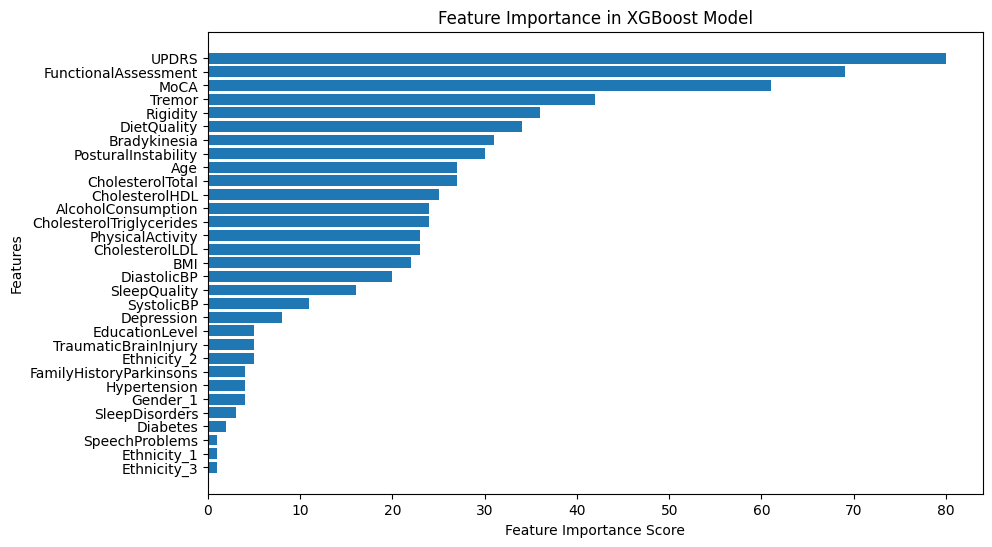

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance
booster = model.get_booster()
importance = booster.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Model")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
proba_case_2 = model.predict_proba(borderline_case_2)[0][1]  # Probability of Parkinson's
threshold = 0.4  # Lower than default 0.5

if proba_case_2 >= threshold:
    print("🟡 Adjusted Prediction for Case 2: 🔴 Parkinson’s detected")
else:
    print("🟡 Adjusted Prediction for Case 2: 🟢 No Parkinson’s detected")


🟡 Adjusted Prediction for Case 2: 🟢 No Parkinson’s detected


In [ ]:
print("🟡 Probability of Parkinson’s for Case 2:", proba_case_2)


🟡 Probability of Parkinson’s for Case 2: 0.031057684


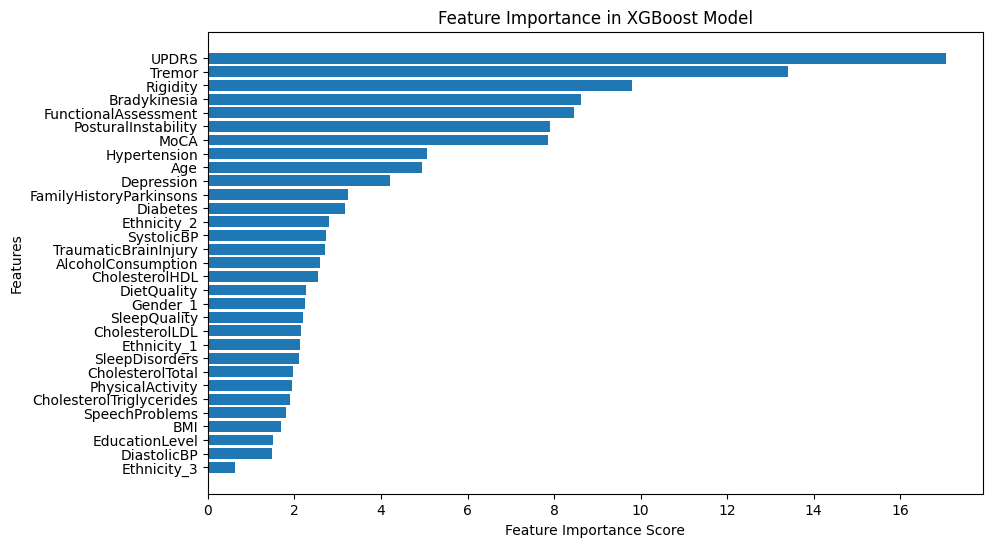

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

booster = model.get_booster()
importance = booster.get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Model")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from xgboost import XGBClassifier

# Increase weight for Parkinson’s cases (1) to balance the dataset
model = XGBClassifier(scale_pos_weight=2)  # Try 2, 3, or adjust based on class ratio
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,         # Increase trees for better learning
    learning_rate=0.05,       # Slower learning to avoid overfitting
    max_depth=6,              # Controls model complexity
    min_child_weight=2,       # Avoids overfitting
    subsample=0.8,            # Prevents overfitting by using 80% of data per tree
    colsample_bytree=0.8,     # Uses 80% of features per tree
    gamma=0.2,                # Regularization to reduce overfitting
    scale_pos_weight=2,       # Balances Parkinson’s class weight
    random_state=42
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
borderline_cases = df[
    (df["UPDRS"] > 20) & (df["UPDRS"] < 30) &  # Moderate motor symptoms
    (df["MoCA"] > 22) & (df["MoCA"] < 26) &    # Mild cognitive issues
    (df["Tremor"] == 1)                        # Has tremor but mild
]
X_borderline = borderline_cases.drop(columns=["Diagnosis"])  # Remove target
y_borderline = borderline_cases["Diagnosis"]  # True labels


In [ ]:
probabilities = model.predict_proba(X_borderline)[:, 1]  # Probability for Parkinson’s
print("Borderline Case Probabilities:", probabilities)


Borderline Case Probabilities: [0.05226881 0.02330093 0.03209689 0.04481721 0.05425896 0.15855646]


In [ ]:
print(y_borderline.values)  # Check true labels for borderline cases


[0 0 0 0 0 0]


In [ ]:
borderline_PD_cases = df[
    (df["Diagnosis"] == 1) & (df["UPDRS"] > 20) & (df["UPDRS"] < 30)
]
X_borderline_PD = borderline_PD_cases.drop(columns=["Diagnosis"])
y_borderline_PD = borderline_PD_cases["Diagnosis"]

probabilities_PD = model.predict_proba(X_borderline_PD)[:, 1]
print(probabilities_PD)


[0.91969883 0.7278985  0.87798345 0.44755474 0.8911381  0.9172602
 0.93334645 0.94024265 0.9185938  0.95147276 0.9550191  0.90901107
 0.9398201  0.90265507 0.49586454]


In [ ]:
borderline_PD_cases.iloc[[3, 14]]


,Age,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,...,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,Gender_1,Ethnicity_1,Ethnicity_2,Ethnicity_3
445,-0.310729,0,1.066923,0,10.866581,6.611932,7.231291,5.080182,0,0,...,1,1,0,0,0,1,True,False,False,False
1956,0.465684,3,0.498095,0,18.481780,6.971209,1.524140,8.957995,0,0,...,1,1,0,0,0,1,True,False,False,False


In [ ]:
threshold = 0.4  # Label as PD if probability > 40%
predictions_PD = (probabilities_PD > threshold).astype(int)
print(predictions_PD)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
threshold = 0.4
predictions_PD = (probabilities_PD > threshold).astype(int)
